# Principal Component Analysis (PCA)

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
#check for missing values
dataset.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [5]:
X = dataset.iloc[:,:-1].values
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
y = dataset.iloc[:,-1].values
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [8]:
print(X_train)

[[1.200e+01 1.510e+00 2.420e+00 ... 1.050e+00 2.650e+00 4.500e+02]
 [1.272e+01 1.810e+00 2.200e+00 ... 1.160e+00 3.140e+00 7.140e+02]
 [1.208e+01 1.390e+00 2.500e+00 ... 9.300e-01 3.190e+00 3.850e+02]
 ...
 [1.349e+01 1.660e+00 2.240e+00 ... 9.800e-01 2.780e+00 4.720e+02]
 [1.293e+01 2.810e+00 2.700e+00 ... 7.700e-01 2.310e+00 6.000e+02]
 [1.305e+01 1.650e+00 2.550e+00 ... 1.120e+00 2.510e+00 1.105e+03]]


In [9]:
print(X_test)

[[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
  5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.242e+01 1.610e+00 2.190e+00 2.250e+01 1.080e+02 2.000e+00 2.090e+00
  3.400e-01 1.610e+00 2.060e+00 1.060e+00 2.960e+00 3.450e+02]
 [1.364e+01 3.100e+00 2.560e+00 1.520e+01 1.160e+02 2.700e+00 3.030e+00
  1.700e-01 1.660e+00 5.100e+00 9.600e-01 3.360e+00 8.450e+02]
 [1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
  1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
 [1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
  3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
 [1.349e+01 3.590e+00 2.190e+00 1.950e+01 8.800e+01 1.620e+00 4.800e-01
  5.800e-01 8.800e-01 5.700e+00 8.100e-01 1.820e+00 5.800e+02]
 [1.176e+01 2.680e+00 2.920e+00 2.000e+01 1.030e+02 1.750e+00 2.030e+00
  6.000e-01 1.050e+00 3.800e+00 1.230e+00 2.500e+00 6.070e+02]
 [1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.3

In [10]:
print(y_train)

[2 2 2 1 1 2 3 1 1 1 2 1 1 1 2 3 3 1 2 2 1 2 3 2 2 1 3 2 3 1 2 1 2 1 3 3 3
 3 2 2 1 3 1 2 3 1 2 1 3 2 2 1 2 2 2 1 2 2 2 3 2 2 2 2 1 1 1 3 1 2 3 3 1 2
 1 2 2 1 3 2 2 3 3 2 2 2 3 3 2 1 2 1 3 2 2 1 1 2 1 1 1 3 1 3 3 1 2 2 3 1 2
 2 1 1 1 2 2 1 3 3 2 2 2 1 3 3 3 3 3 2 1 1 3 2 2 3 2 3 3 2 3 1]


In [11]:
print(y_test)

[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2]


### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[-1.23907779 -0.76709153  0.23605013 ...  0.39472053  0.08573352
  -0.97342953]
 [-0.34016831 -0.5095809  -0.55347944 ...  0.87437937  0.77219361
  -0.09029683]
 [-1.13919896 -0.87009578  0.5231518  ... -0.12854366  0.84224056
  -1.1908675 ]
 ...
 [ 0.62116544 -0.63833622 -0.4099286  ...  0.08948309  0.26785558
  -0.89983514]
 [-0.07798638  0.34878788  1.24090595 ... -0.82622924 -0.39058573
  -0.47164959]
 [ 0.07183187 -0.6469199   0.70259033 ...  0.69995797 -0.11039794
   1.21767621]]


In [14]:
print(X_test)

[[ 8.70862520e-01  7.35053823e-01  6.66702626e-01  1.40785508e-01
   5.89078096e-01 -6.86186919e-01 -1.41323951e+00  1.11530943e+00
  -1.30905353e+00  3.66668319e-01  2.27239142e-03 -1.07704582e+00
  -2.04033618e-01]
 [-7.14713925e-01 -6.81254654e-01 -5.89367143e-01  8.92347242e-01
   6.61127269e-01 -4.16142051e-01  1.08268993e-01 -2.21884779e-01
   8.07132875e-02 -1.26108814e+00  4.38325881e-01  5.20024595e-01
  -1.32467549e+00]
 [ 8.08438251e-01  5.97714820e-01  7.38478041e-01 -1.30221302e+00
   1.23752065e+00  6.95807407e-01  1.04305199e+00 -1.64265363e+00
   1.66501362e-01  3.42991998e-02  2.27239142e-03  1.08040018e+00
   3.47924317e-01]
 [-9.76895857e-01 -1.04176954e+00 -2.16842628e+00 -8.21213511e-01
   3.75924170e+00 -6.54416934e-01 -6.97235507e-01 -1.89337754e+00
   1.60774102e+00 -9.24457875e-01  1.39764356e+00  6.74127880e-01
  -7.69160332e-02]
 [ 9.70741352e-01 -4.32327709e-01  1.16913053e+00 -7.31026103e-01
   1.16547148e+00  1.17235717e+00  8.04383993e-01  1.95988412e-01


### Applying PCA

In [15]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
X_train =pca.fit_transform(X_train)
X_test =pca.transform(X_test)

In [16]:
print(X_train)

[[ 1.45106785  1.85914043]
 [-1.16342695  1.41297331]
 [ 0.34393861  1.93870926]
 [-2.07390734 -1.34699026]
 [-2.23752594 -1.19567755]
 [ 0.7828473   3.0422216 ]
 [ 3.43658215 -0.77277023]
 [-2.62885478 -1.98362772]
 [-2.80963595 -1.6148153 ]
 [-2.20232818 -0.08703376]
 [-1.31986145  0.49139954]
 [-1.97911028 -1.83895989]
 [-3.61043285 -2.64964226]
 [-3.2259453  -1.87544577]
 [ 1.47273339  1.2067983 ]
 [ 2.41322827 -2.10176234]
 [ 2.72253833 -1.49073541]
 [-2.21048357 -0.73591746]
 [ 1.22981038  2.13708256]
 [-2.59662572 -0.57316588]
 [-2.28538266 -0.79400766]
 [-1.14029108  1.4207965 ]
 [ 2.97735484 -0.31157243]
 [-2.34420508  1.84502004]
 [ 0.29998197  0.63284081]
 [-1.97134055 -1.75622297]
 [ 2.87846692 -1.45084492]
 [ 0.40424353  2.67636222]
 [ 3.07957409  0.29560768]
 [-3.49667734 -1.22010861]
 [ 0.23737414  2.1574701 ]
 [-1.2576631  -1.87767574]
 [-0.89970236  2.28471158]
 [-1.49231796 -0.75242762]
 [ 3.58819777 -0.71855615]
 [ 2.3386701  -2.53886618]
 [ 2.11655553 -2.05173216]
 

In [17]:
print(X_test)

[[ 2.14425564 -1.15538486]
 [-0.0159732   1.81440866]
 [-2.20445693 -1.19143642]
 [-2.06455478  1.05443572]
 [-2.30787374 -2.01905406]
 [ 2.99584678 -0.26873029]
 [ 1.16395196  0.75482124]
 [-4.35846123 -2.24433231]
 [ 3.02098821 -0.62979564]
 [ 1.5199562   1.36004749]
 [-1.84535734 -0.69429198]
 [-1.11259775 -0.98627324]
 [-0.19107352  2.22082219]
 [-3.1823989  -1.27355731]
 [-0.95478511  1.38307198]
 [ 0.31785689  2.26328276]
 [ 1.7321149  -1.54386756]
 [-2.00927736 -0.27940927]
 [ 1.65857923  1.6887353 ]
 [-2.76886315 -1.60953433]
 [-2.94841823 -0.83675534]
 [-0.15572422  1.23860826]
 [ 1.22335416 -0.27209438]
 [-2.68157448 -0.52175652]
 [-2.65673502 -0.95929483]
 [ 2.74487778 -0.54428005]
 [-2.90558494 -0.77789532]
 [-2.34551882 -0.30685827]
 [-2.23617779 -2.48304767]
 [ 3.45631981 -1.14458259]
 [-1.1646671   2.53337119]
 [ 1.58795612 -2.32415499]
 [ 2.46811687 -2.01346853]
 [-3.11781167 -2.28227675]
 [-0.89888083  1.32137658]
 [-1.13300372  2.17895166]]


### Training the Logistic Regression model on the Training set

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Making the Confusion Matrix¶

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]


0.9722222222222222

###  Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


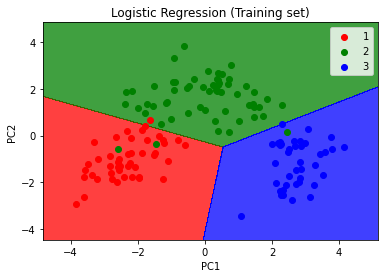

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


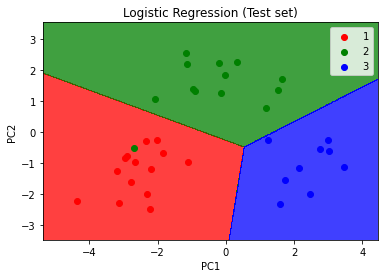

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()